## **Importing packages**

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

sns.set_style("white")
warnings.filterwarnings("ignore")

## **Reading data**

In [67]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

In [68]:
data = [train_data, test_data]

## **Data analysis**

In [69]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [70]:
df_train_nunique = pd.DataFrame(train_data.dtypes, columns=["dtype"])
df_train_nunique["train_nunique"] = train_data.nunique().values
df_test_nunique = pd.DataFrame(test_data.dtypes, columns=["dtype"])
df_test_nunique["test_nunique"] = test_data.nunique().values
pd.concat((df_train_nunique, df_test_nunique["test_nunique"]), axis=1)

,dtype,train_nunique,test_nunique
PassengerId,object,8693,4277.0
HomePlanet,object,3,3.0
CryoSleep,object,2,2.0
Cabin,object,6560,3265.0
Destination,object,3,3.0
Age,float64,80,79.0
VIP,object,2,2.0
RoomService,float64,1273,842.0
FoodCourt,float64,1507,902.0
ShoppingMall,float64,1115,715.0


In [71]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


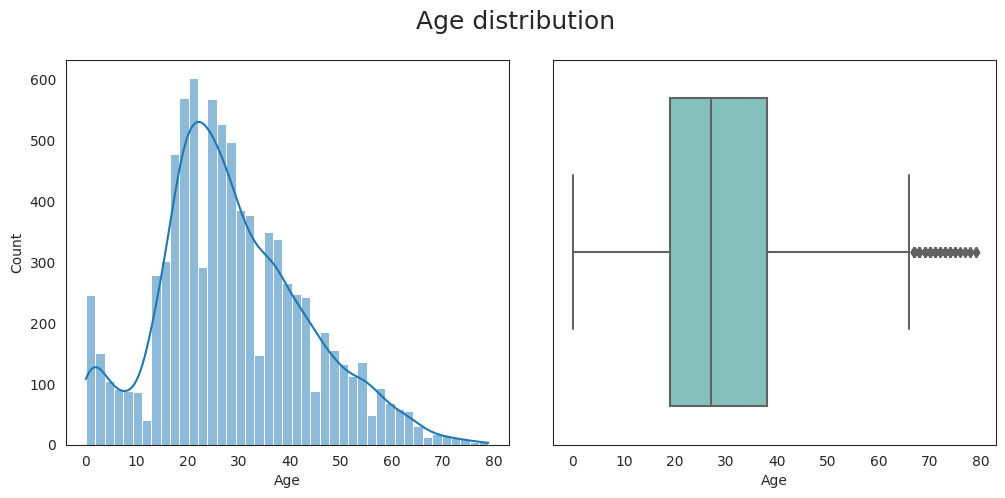

In [72]:
gs = gridspec.GridSpec(1, 2, wspace=0.1)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle("Age distribution", fontsize=18)

# Histogram of age distribution
ax1 = plt.subplot(gs[0, 0])
sns.histplot(x="Age", data=train_data, kde=True)

# Boxplot of age distribution
ax2 = plt.subplot(gs[0, 1])
sns.boxplot(x="Age", data=train_data, palette="GnBu");

In [73]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


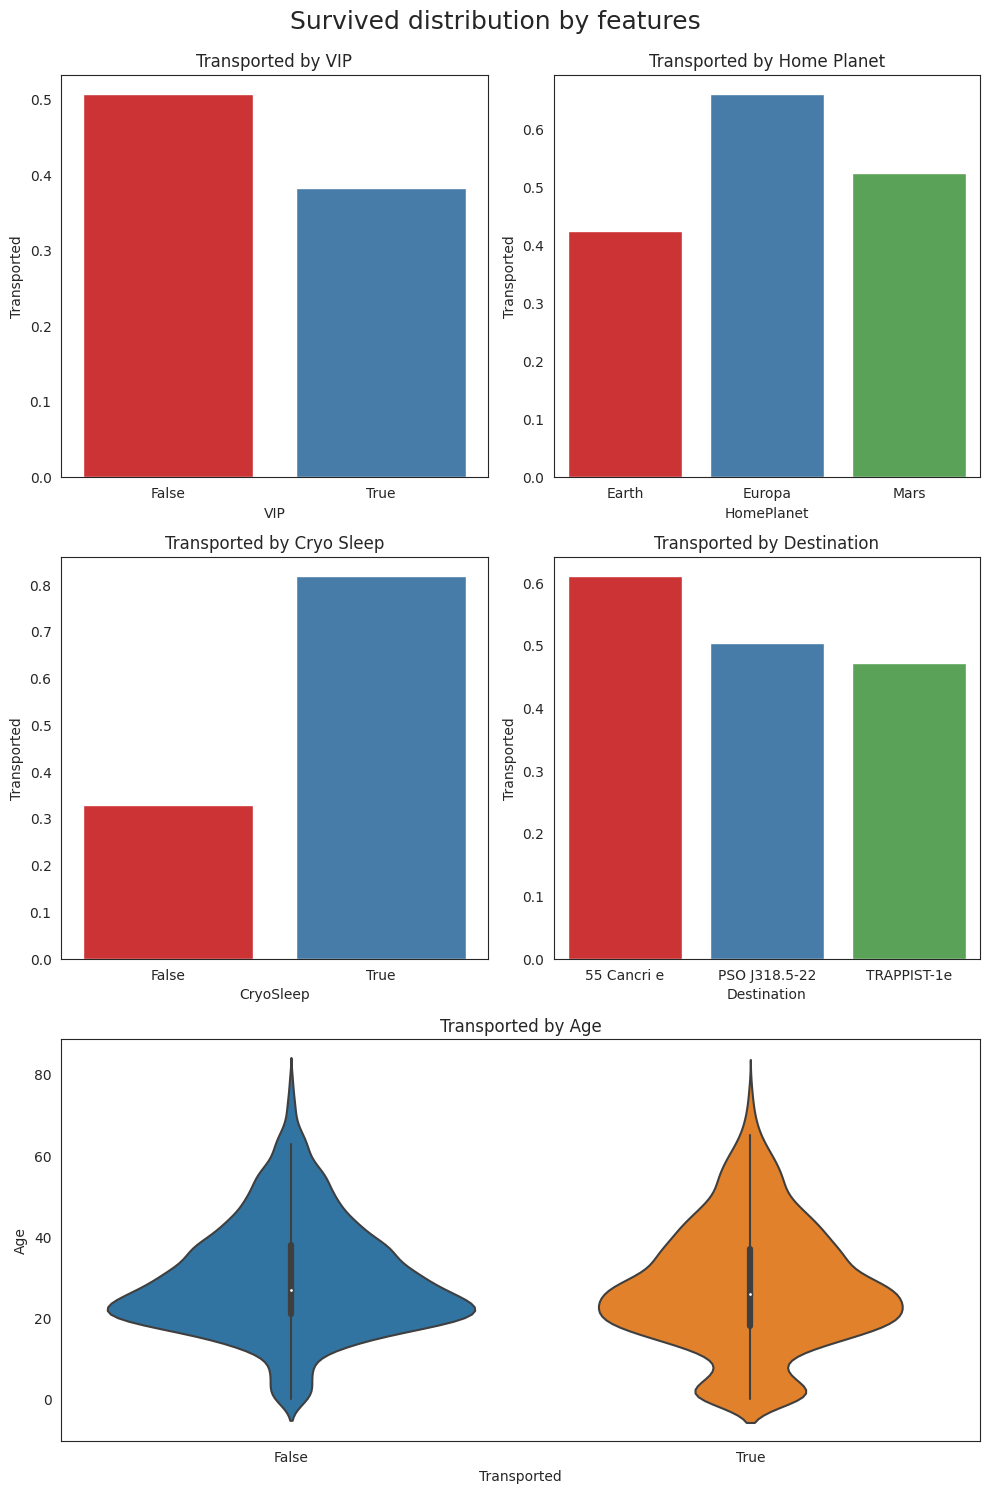

In [74]:
gs = gridspec.GridSpec(3, 2)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(10, 15))
fig.suptitle("Survived distribution by features", fontsize=18, y=0.993)

# Transported by VIP
ax1 = plt.subplot(gs[0, 0])
transported_by_vip = train_data.groupby("VIP")["Transported"].mean().reset_index()
sns.barplot(x="VIP", y="Transported", data=transported_by_vip, palette="Set1")
ax1.set_title("Transported by VIP")

# Transported by Home Planet
ax2 = plt.subplot(gs[0, 1])
transported_by_planet = train_data.groupby("HomePlanet")["Transported"].mean().reset_index()
sns.barplot(x="HomePlanet", y="Transported", data=transported_by_planet, palette="Set1")
ax2.set_title("Transported by Home Planet")

# Transported by Cryo Sleep
ax3 = plt.subplot(gs[1, 0])
transported_by_cryo = train_data.groupby("CryoSleep")["Transported"].mean().reset_index()
sns.barplot(x="CryoSleep", y="Transported", data=transported_by_cryo, palette="Set1")
ax3.set_title("Transported by Cryo Sleep")

# Transported by Destination
ax4 = plt.subplot(gs[1, 1])
transported_by_destination = train_data.groupby("Destination")["Transported"].mean().reset_index()
sns.barplot(x="Destination", y="Transported", data=transported_by_destination, palette="Set1")
ax4.set_title("Transported by Destination")

ax5 = plt.subplot(gs[2, :])
sns.violinplot(y="Age", x="Transported", data=train_data, kde=True)
ax5.set_title("Transported by Age")

plt.tight_layout();

In [75]:
print(f"Train data shape: {train_data.shape}", 
      f"Test data shape: {test_data.shape}", sep="\n")

Train data shape: (8693, 14)
Test data shape: (4277, 13)


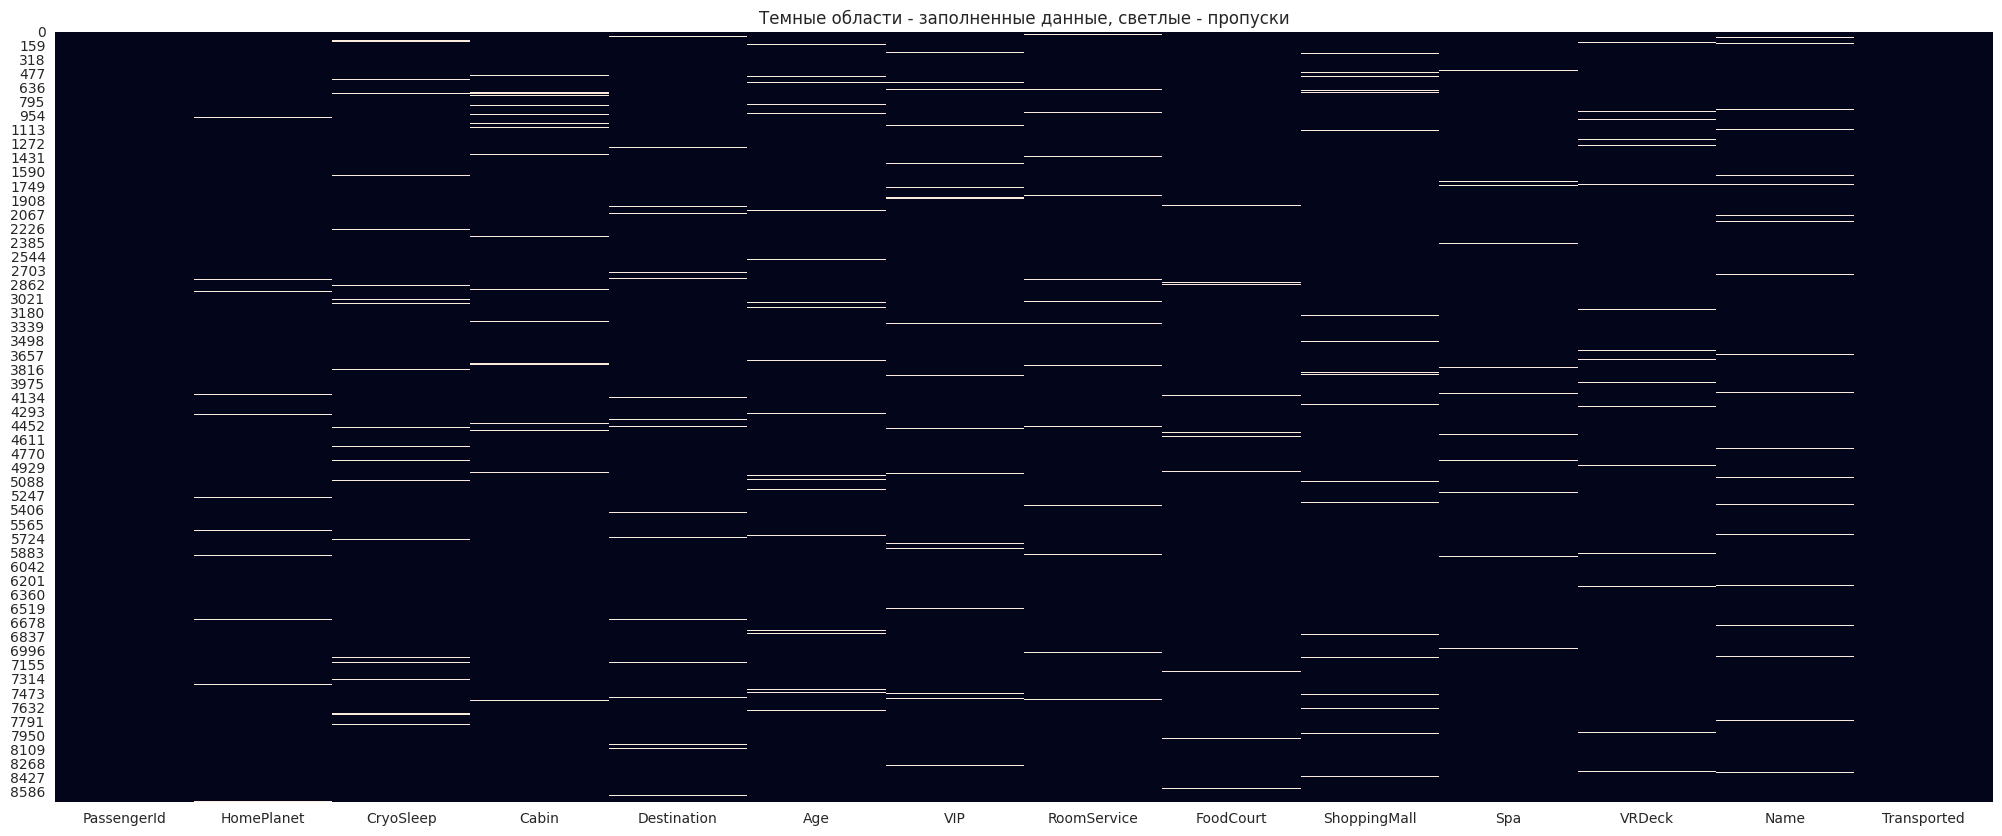

In [76]:
plt.figure(figsize=(25, 10))
ax = sns.heatmap(~train_data.isna(), cbar=False, cmap=sns.cm.rocket_r)
ax.set_title("Темные области - заполненные данные, светлые - пропуски");

In [77]:
train_na = ((train_data.shape[0] - train_data.dropna(axis=0).shape[0]) / train_data.shape[0]) * 100
test_na = ((test_data.shape[0] - test_data.dropna(axis=0).shape[0]) / test_data.shape[0]) * 100

print(f"Percent of rows with NaN in Train data: {round(train_na, 2)}%", 
      f"Percent of rows with NaN in Test data: {round(test_na, 2)}%", sep="\n")

Percent of rows with NaN in Train data: 24.01%
Percent of rows with NaN in Test data: 23.29%


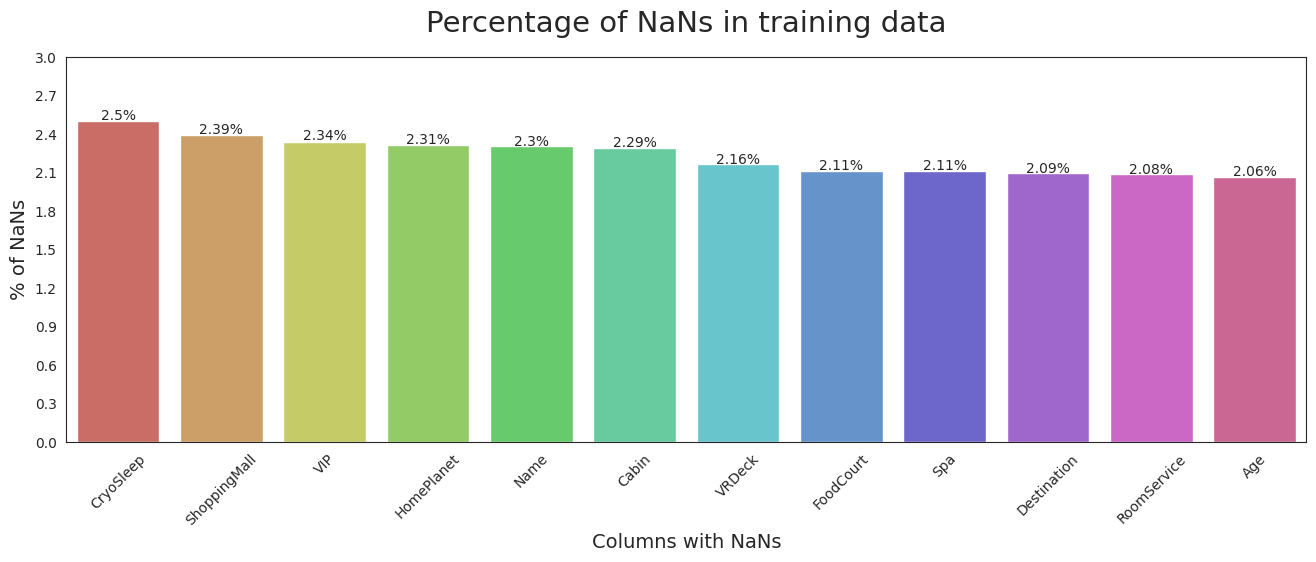

In [78]:
train_na_percent = ((train_data.isna().sum()[train_data.isna().sum() > 0] / train_data.shape[0]) * 100).sort_values(ascending=False)

plt.figure(figsize=(16, 5))
ax = sns.barplot(x=train_na_percent.index, y=train_na_percent.values, palette="hls")
ax.set_title("Percentage of NaNs in training data", fontsize=21, pad=18)
ax.set_ylabel("% of NaNs", fontsize=14)
ax.set_xlabel("Columns with NaNs", fontsize=14)
ax.set_yticks(np.arange(0, 3.3, 0.3))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

for p, val in zip(ax.patches, train_na_percent.values.round(2)):
    ax.text(p.get_x() + p.get_width()/2.,
            val + 0.01,
            f'{val}%',
            ha="center") 

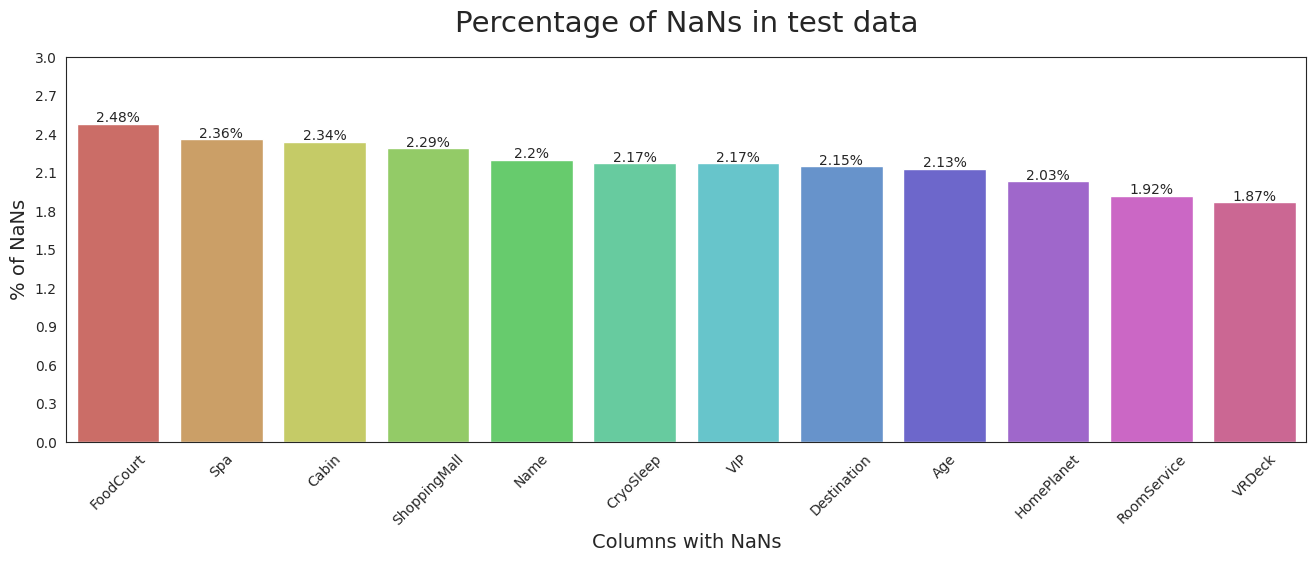

In [79]:
test_na_percent = ((test_data.isna().sum()[test_data.isna().sum() > 0] / test_data.shape[0]) * 100).sort_values(ascending=False)

plt.figure(figsize=(16, 5))
ax = sns.barplot(x=test_na_percent.index, y=test_na_percent.values, palette="hls")
ax.set_title("Percentage of NaNs in test data", fontsize=21, pad=18)
ax.set_ylabel("% of NaNs", fontsize=14)
ax.set_xlabel("Columns with NaNs", fontsize=14)
ax.set_yticks(np.arange(0, 3.3, 0.3))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

for p, val in zip(ax.patches, test_na_percent.values.round(2)):
    ax.text(p.get_x() + p.get_width()/2.,
            val + 0.01,
            f'{val}%',
            ha="center") 

## **EDA**

In [80]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [81]:
for dataset in data:
    dataset["PassengerGroup"] = [group.split("_")[1].strip("0") for group in dataset["PassengerId"]]

In [82]:
for dataset in data:
    dataset["Deck"] = [cabin.split("/")[0].strip() if not isinstance(cabin, float) else np.NaN for cabin in dataset["Cabin"] ]
    dataset["Side"] = [cabin.split("/")[2].strip() if not isinstance(cabin, float) else np.NaN for cabin in dataset["Cabin"]]

In [83]:
for dataset in data:
    dataset.drop(["Name", "Cabin"], axis=1, inplace=True)
train_data.drop(["PassengerId"], axis=1, inplace=True)

PassengerId = test_data["PassengerId"]
test_data.drop(["PassengerId"], axis=1, inplace=True)

In [84]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,F,S


## **Test**

In [85]:
columns_1 = ["HomePlanet", "CryoSleep", "Destination", "VIP", "PassengerGroup", "Deck", "Side"]
columns_2 = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
replaces = {column: train_data[column].value_counts().index[0] for column in columns_1}
replaces_2 = {column: np.mean(train_data[column]).round(2) for column in columns_2}
replaces.update(replaces_2)
replaces

{'HomePlanet': 'Earth',
 'CryoSleep': False,
 'Destination': 'TRAPPIST-1e',
 'VIP': False,
 'PassengerGroup': '1',
 'Deck': 'F',
 'Side': 'S',
 'Age': 28.83,
 'RoomService': 224.69,
 'FoodCourt': 458.08,
 'ShoppingMall': 173.73,
 'Spa': 311.14,
 'VRDeck': 304.85}

In [86]:
for column, value in replaces.items():
    for dataset in data:
        dataset[column].fillna(value, inplace=True)

In [87]:
bins = [-1, 12, 18, 30, 50, 100]
labels = range(len(bins)-1)
for dataset in data:
    dataset["AgeGroup"] = pd.cut(dataset["Age"], bins=bins, labels=labels)

In [88]:
columns_1 = ["HomePlanet", "Destination", "Deck", "Side"]
columns_2 = ["CryoSleep", "VIP"]

for column in columns_2:
    for dataset in data:
        dataset[column] = dataset[column].map({True: 1, False: 0})

train_data_copy = train_data.copy()
for column in columns_1:
    for dataset in data:
        values = range(len(train_data_copy[column].unique()))
        replaces = dict(zip(train_data_copy[column].unique(), values))
        dataset[column] = dataset[column].map(replaces)
train_data["Transported"] = train_data["Transported"].map({True: 1, False: 0})
        
del train_data_copy

In [89]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,Deck,Side,AgeGroup
0,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,3
1,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,1,1,2
2,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,2,1,4
3,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,2,2,1,3
4,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,1,1,1


In [90]:
print(train_data.isna().any().any())
print(test_data.isna().any().any())

False
False


## **Modeling**

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [95]:
X, y = train_data.drop(["Transported"], axis=1).copy(), train_data["Transported"].copy()

In [106]:
rfc_model = RandomForestClassifier()
params = {"n_estimators": [2100], "max_depth": [12], "n_jobs": [-1]}
model = GridSearchCV(rfc_model, param_grid=params)
model.fit(X, y)
pred = model.predict(test_data)
print(model.best_estimator_)

RandomForestClassifier(max_depth=12, n_estimators=2100, n_jobs=-1)


In [108]:

submission = pd.DataFrame({"PassengerId": PassengerId, 
                           "Transported": pred})
submission["Transported"] = submission["Transported"].map({1: True, 0: False})
submission.to_csv("submission.csv", index=False)